In [1]:
#Importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default')

In [2]:
#Cargo el DataFrame
df = pd.read_csv('events.csv', low_memory=False)
df.head(5)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import geopandas as gpd
from geopandas import GeoDataFrame
import shapely
import shapely.wkt
from shapely.geometry import Point
from shapely.geometry import Polygon
import math

In [4]:
america=gpd.read_file('gadm36_BRA_1.shp')

In [5]:
america.head(5)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,BRA,Brazil,BRA.1_1,Acre,None,None,Estado,State,None,BR.AC,"POLYGON ((-68.10552979000001 -10.72191715, -68..."
1,BRA,Brazil,BRA.2_1,Alagoas,None,None,Estado,State,None,BR.AL,"(POLYGON ((-35.88986206 -9.844305990000001, -3..."
2,BRA,Brazil,BRA.3_1,Amapá,None,None,Estado,State,None,BR.AP,"(POLYGON ((-50.82569504 2.522084, -50.82569504..."
3,BRA,Brazil,BRA.4_1,Amazonas,Amazone,None,Estado,State,None,BR.AM,"POLYGON ((-58.13698959 -7.35613918, -58.136821..."
4,BRA,Brazil,BRA.5_1,Bahia,Ba¡a,None,Estado,State,None,BR.BA,"(POLYGON ((-38.69208145 -17.95958328, -38.6920..."


In [6]:
regiones_brasil= df.loc[(pd.notna(df['region'])) & (df['region']!='Unknown')&(df['country']=='Brazil'),['person','region','event']]
regiones_brasil.head(5)

,person,region,event
1,0004b0a2,Pernambuco,visited site
5,0006a21a,Rio de Janeiro,visited site
9,000a54b2,Rio de Janeiro,visited site
16,000a54b2,Rio de Janeiro,visited site
45,00184bf9,Sao Paulo,visited site


In [7]:
regiones_brasil['event'].value_counts()

visited site    71930
Name: event, dtype: int64

In [8]:
regiones_brasil['region'].value_counts()

Sao Paulo              24996
Minas Gerais            7755
Rio de Janeiro          6913
Bahia                   5737
Pernambuco              2962
Ceara                   2829
Parana                  2602
Rio Grande do Sul       2576
Federal District        1739
Goias                   1564
Santa Catarina          1511
Para                    1382
Maranhao                1303
Espirito Santo          1257
Rio Grande do Norte     1064
Paraíba                  875
Piaui                    824
Alagoas                  751
Mato Grosso do Sul       618
Amazonas                 600
Tocantins                596
Mato Grosso              487
Sergipe                  405
Rondonia                 273
Amapa                    148
Acre                      96
Roraima                   67
Name: region, dtype: int64

In [9]:
regiones_brasil_ingresos = regiones_brasil.groupby('region').agg({'person': 'count'})
regiones_brasil_ingresos

,person
region,
Acre,96
Alagoas,751
Amapa,148
Amazonas,600
Bahia,5737
Ceara,2829
Espirito Santo,1257
Federal District,1739
Goias,1564


In [10]:
america=america.rename(columns={'NAME_1':'region'})

In [11]:
brasil_mapa= america.loc[:,['region','geometry']].reindex()

In [12]:
brasil_mapa.head(5)

,region,geometry
0,Acre,"POLYGON ((-68.10552979000001 -10.72191715, -68..."
1,Alagoas,"(POLYGON ((-35.88986206 -9.844305990000001, -3..."
2,Amapá,"(POLYGON ((-50.82569504 2.522084, -50.82569504..."
3,Amazonas,"POLYGON ((-58.13698959 -7.35613918, -58.136821..."
4,Bahia,"(POLYGON ((-38.69208145 -17.95958328, -38.6920..."


In [13]:
#sacamos las tildes del geopandas.dataframe para que coincidan con las regiones del set de datos
brasil_mapa['region'][2]='Amapa'
brasil_mapa['region'][5]='Ceara'
brasil_mapa['region'][6]='Federal District'
brasil_mapa['region'][7]='Espirito Santo'
brasil_mapa['region'][8]='Goias'
brasil_mapa['region'][9]='Maranhao'
brasil_mapa['region'][13]='Para'
brasil_mapa['region'][15]='Parana'
brasil_mapa['region'][17]='Piaui'
brasil_mapa['region'][21]='Rondonia'
brasil_mapa['region'][24]='Sao Paulo'


In [14]:
brasil_merge=pd.merge(brasil_mapa, regiones_brasil_ingresos, on='region', how='left')

C:\Users\Seven\Anaconda3\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


Text(127.613,0.5,'Longitud')

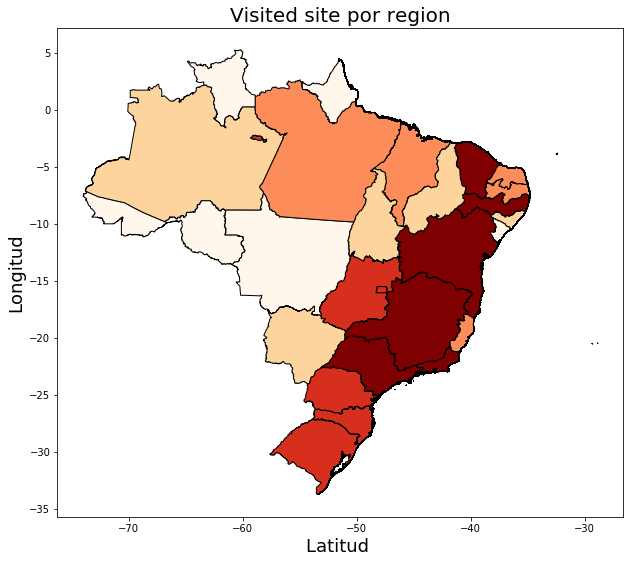

In [15]:
plot = brasil_merge.plot(column='person',cmap='OrRd', scheme="Quantiles", figsize= (12,9),edgecolor='black')
plot.set_title('Visited site por region', fontsize=20);
plot.set_xlabel('Latitud ', fontsize=18)
plot.set_ylabel('Longitud', fontsize=18)